In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from barplot_brackets import *
from barplot_group_means import *

In [ ]:
'''# TODO

# 
# something clever with deciding which/all sessions to look at

# data_folder = "./data/"
# group = "ee1"
# session = "2cfrt"
# scorer = "mel"

# ee1_vns = [2,3,6,7,9,11]
# ee1_sham = [1,4,5,8,10]
# ee1_exclude = []

# ee2_vns = [1,3,6,8,9]
# ee2_sham = [2,4,5,7,10]
# ee2_exclude = [ 6 ] # cuff problems

# vns_color = 'blue'
# sham_color = 'red'



#---- PROBABLY TRASH
# sessions = { # true for session(s) to graph.
#     "1AFC"   : True,
#     "2CRFT"  : False,
#     "3EXT1"  : False,
#     "4EXT2"  : False,
#     "5RET"   : False,
#     "6SR1"   : False,
#     "7SR2"   : False,
#     "8REN"   : False,
#     "9RST"   : False
# }'''

In [ ]:
# TODO: stats
# see https://scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

In [65]:
session_data = "./data/ee1/ee1-3ext1-mel.csv"
session="EXT 1"

vns = [2,3,6,7,9,11]
sham = [1,4,5,8,10]

vns_color = 'red'
sham_color = 'blue'

time_per_trial = 30  # length of each trial in seconds

In [15]:
df = pd.read_csv(session_data)
df.set_index("RAT",inplace=True)

df = 100 * df / time_per_trial  # change into percents

# sessions with baseline.
try:
    bl_df = df.loc[:,['BL1','BL2']]  # new df for just baseline
    df = df.loc[:, ~df.columns.isin(['BL1','BL2'])]  # remove bl from df
except KeyError:
    pass

In [17]:
# total session means, for bar plot

all_means = df.mean(axis=1,numeric_only=True)

vns_means = all_means.loc[vns]
sham_means = all_means.loc[sham]

In [ ]:
# barplot of group means for all trials

# barplot_group_means(
#     x=(1,3),
#     y=(vns_means,sham_means),
#     lbls=("VNS","SHAM"),
#     colors=(vns_color,sham_color),
#     w=1,
#     p=None
# )

In [18]:
# Bins of 2 trials

df_bins = pd.DataFrame(index=df.index)

bins = int(df.shape[1] / 2)

for i in range(0,bins):
    a = (2*i)
    b = (2*i)+2
    df_bins[i+1] = df.iloc[:,a:b].mean(axis=1)

In [67]:
data = [df_bins.loc[vns], df_bins.loc[sham]]
group_labels = ["VNS","SHAM"]

group_mean_by_bin = [group_df.mean() for group_df in data]
group_error_by_bin = [group_df.sem() for group_df in data]

group_colors = [vns_color, sham_color]

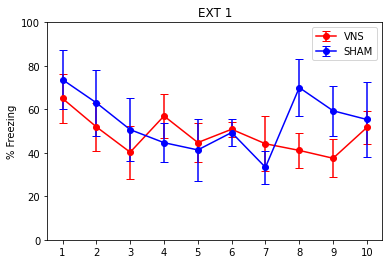

In [68]:
# trials = [int(i) for i in df_bins.columns]

fig, ax = plt.subplots()

# ax.plot(
#     vns_data,
#     color=vns_color,
#     label="VNS",
#     marker="."
# )

# TODO: add baseline
# TODO: make function

for grp_i in range(0,len(group_mean_by_bin)):

    ax.errorbar(
        x=group_mean_by_bin[grp_i].index,
        y=group_mean_by_bin[grp_i],
        yerr=group_error_by_bin[grp_i],
        label=group_labels[grp_i],
        color=group_colors[grp_i],
        marker=".", markersize=12,
        capsize=4,
    )

ax.set(
    title=session,
    xticks=[i for i in range(1,len(group_mean_by_bin[0])+1)],
    ylim=[0,100],
    ylabel= "% Freezing"
)

ax.legend()

plt.show(fig)